# Data Science Project -- Book of Mormon


## Did the Book of Mormon and the Doctrine and Covenants are more likely written by the same author or different authors

Null Hypothesis: Each book of the Book of Mormon was written by different authors.

Methodology: Texts will be separated into individual words and the 15 most common words greater than four letters will be compared. Using matplotlib and pandas, the most common words frequency will be read into an array, and using the distance formula, which is based on the Pythogorean theorem r = sqrt((x_1 - x-x_2)^2 + (y_1 - y_2)^2), we will calculate into them array. Finally, we will make a graph using matplotlib to show which author is most likely.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Caveats

This is not the most robust way to do this, a more rigorous analysis would  involve a different method entirely. This is merely a starting point to determine whether the Harvard study that showed the Book of Mormon was the work of the same author, Joseph Smith, or the work of different authors as a BYU study suggested.  Furhter analysis would use more rigorous methods and a different algorithm. 

The KNN algorithm is used when it is clear there two clear choices as it is a decision algorithm. Textual analysis and determining authorship is likely far more complex.

![Moroni](Moroni.jpg)

#  Methodology

This project  started by cleaning the data from selected books of the Book of Mormon, selected sections from the Doctrine and Covenants, and finally using Edgar Allen Poe as a comparison to see if the work remains consistently closer to Joseph Smith's writing. A python script ws genderated to get the frequency of each word, and 10 of the most commonly used words were selected and averaged for the basis of comparison. Those same ten words are then selected in each Book of the Mook of Mormon. The books were sourced from Wiki Source and the Poe Museum. A series of BASH and Python scripts were used to remove punctuation from the text, a Python script then read in the file, and printed out the words one line each to a different file. A final BASH script sorted the list whil the final Python script counted the words in each list, divided the word by the total, and then printed out each word with its frequency into a commma separated value file.

The final step was creating this Jupyter Notebook The distance algorithm is then used to see if the writings in the Book of Mormon are consistently nearer to the work of Joseph Smith.

If the first step shows that the works more than 80% closer to the work of Joseph Smith, the next step will be finding the writings of people known to have worked on the Book of Mormon, such as Joseph Smith, Martin Harris, and Oliver Cowdery to see which of those writings it is closest to.

# Null Hypothesis

There are arguments that could be made for either of the two most commmonly proposed scenario to be the null hypothesis. The first option that Joseph Smith told the truth and he translated the Golden Plates. The second argument is based on the character of Joseph Smith and other times his abilities people called his ability to translate languages he did not know into question. Even if the facsimiles in the Book of Abraham and the Kinderhook Plates were known to be translated incorrectly, the Egyptian papyri and the tea tins that Book of Abraham and Kinderhook plates were translated from are documents for which copies are known to exist. No such evidence exists for the Reformed Egyptian of the Book of Mormon.  Smith's own story claims that the plates were taken into Heaven by Moroni, while critics believe the plates never existed.

Depite the second scenario requiring fewer assumptions, this project chose the first option for the null hypothesis, assuming that the Book of Mormon's claim to be a compilation of the works of multiple authors are correct.




In [2]:
amontillado = pd.read_csv("./poetexts/CaskofAmontillado.csv")
amontillado.set_index("Word", inplace=True)

descentintoamaelstrom = pd.read_csv("./poetexts/descentintoamaelstrom.csv")
descentintoamaelstrom.set_index ("Word", inplace=True)

msinabottle  = pd.read_csv("./poetexts/msinabottle.csv")
msinabottle.set_index("Word", inplace=True)

mysteryofmarieroget = pd.read_csv("./poetexts/mysteryofmarieroget.csv")
mysteryofmarieroget.set_index("Word", inplace=True)

pitandpendulum = pd.read_csv("./poetexts/pitandpendulum.csv")
pitandpendulum.set_index("Word", inplace=True)

purloinedletter = pd.read_csv("./poetexts/purloinedletter.csv")
purloinedletter.set_index("Word", inplace=True)

reddeath = pd.read_csv("./poetexts/reddeath.csv")
reddeath.set_index("Word", inplace=True)

ruemorgue = pd.read_csv("./poetexts/ruemorgue.csv")
ruemorgue.set_index("Word", inplace=True)

telltaleheart = pd.read_csv ("./poetexts/telltaleheart.csv")
telltaleheart.set_index("Word", inplace=True)

usher = pd.read_csv("./poetexts/Usher.csv")
usher.set_index("Word", inplace=True)

usher.head(5)

,Frequency
Word,
abandon,0.000108
abeyance,0.000216
about,0.000108
above,0.001405
abroad,0.000216


# Compiling the Poe Texts into one data frame.

To get an average of the words Poe uses, we need to compile all of the collected data frames into a single fame. We will do this using
the merge function. We will also average the final frames at the end of each row to give us an idea of how frequently Edgar Allan Poe uses certain words.


In [3]:

poeframe = amontillado.merge(descentintoamaelstrom, on="Word", how="left")
poeframe.rename(columns={"Frequency_x":"Poe 1", "Frequency_y": "Poe 2"}, inplace=True)
poeframe["Poe 2"] = poeframe["Poe 2"].fillna(0)

poeframe = poeframe.merge(msinabottle, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 3"}, inplace=True)
poeframe["Poe 3"] = poeframe["Poe 3"].fillna(0)

poeframe = poeframe.merge(mysteryofmarieroget, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 4"}, inplace=True)
poeframe["Poe 4"] = poeframe["Poe 4"].fillna(0)

poeframe = poeframe.merge(pitandpendulum, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 5"}, inplace=True)
poeframe["Poe 5"] = poeframe["Poe 5"].fillna(0)

poeframe = poeframe.merge(purloinedletter, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 6"}, inplace=True)
poeframe["Poe 6"] = poeframe["Poe 6"].fillna(0)

poeframe = poeframe.merge(reddeath, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 7"}, inplace=True)
poeframe["Poe 7"] = poeframe["Poe 7"].fillna(0)

poeframe = poeframe.merge(ruemorgue, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 8"}, inplace=True)
poeframe["Poe 8"] = poeframe["Poe 8"].fillna(0)

poeframe = poeframe.merge(telltaleheart, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 9"}, inplace=True)
poeframe["Poe 9"] = poeframe["Poe 9"].fillna(0)

poeframe = poeframe.merge(usher, on="Word", how="left")
poeframe.rename(columns={"Frequency":"Poe 10"}, inplace=True)
poeframe["Poe 10"] = poeframe["Poe 10"].fillna(0)

poeframe["Average"] = poeframe[["Poe 1", "Poe 2", "Poe 3", "Poe 4", "Poe 5", "Poe 6", "Poe 7", "Poe 8", "Poe 9", "Poe 10"]].mean(axis=1)
poeframe.sort_values("Average", ascending=True, inplace=True)

poeframe.tail(50)

,Poe 1,Poe 2,Poe 3,Poe 4,Poe 5,Poe 6,Poe 7,Poe 8,Poe 9,Poe 10,Average
Word,,,,,,,,,,,
this,0.000347,0.000251,0.000424,0.000044,0.000278,0.000117,0.000358,0.000182,0.002317,0.000108,0.000443
thousand,0.001041,0.001129,0.000847,0.000044,0.000139,0.000351,0.000716,0.000061,0.000000,0.000108,0.000444
felt,0.000347,0.000125,0.000212,0.000133,0.001250,0.000234,0.000358,0.000243,0.001158,0.000432,0.000449
from,0.002428,0.000125,0.000212,0.000266,0.000139,0.000117,0.000716,0.000061,0.000386,0.000108,0.000456
made,0.000347,0.000125,0.000212,0.001505,0.000278,0.000117,0.000358,0.001095,0.000386,0.000216,0.000464
threw,0.000694,0.000878,0.000212,0.000000,0.000139,0.000234,0.000716,0.000852,0.000772,0.000216,0.000471
four,0.000694,0.000251,0.001059,0.000177,0.000000,0.000586,0.000716,0.000122,0.001158,0.000000,0.000476
stood,0.001041,0.000125,0.000847,0.000177,0.000556,0.000234,0.000358,0.000182,0.001158,0.000108,0.000479
suddenly,0.000347,0.000251,0.000212,0.000000,0.000278,0.001172,0.000716,0.001156,0.000772,0.000000,0.000490


# Now that we've got Poe sorted out, doing the Doctrine and Covenants will be a little easer becaue of our naming conventions

In [4]:
smith = []
for i in range(1,11):
    smith_frame =pd.read_csv(f'./smithtexts/DCSection{i}.csv')
    smith.append(smith_frame)
    smith_frame.rename(columns={"Frequency":f'Smith{i}'}, inplace=True)
    smith[i-1].set_index("Word", inplace=True)


for i in range(0,10):
    smith_frame = smith_frame.merge(smith[i], on="Word", how="left") 
    smith_frame.rename(columns={"Frequency":f'Smith{i+1}'}, inplace=True)

smith_frame.rename(columns={"Smith10_x":"Smith10"}, inplace=True)
smith_frame = smith_frame.drop("Smith10_y", axis = 1)

for i in range(1,9):
    smith_frame[f"Smith{i+1}"] = smith_frame[f"Smith{i+1}"].fillna(0)


smith_frame["Average"] = smith_frame[["Smith1", "Smith2", "Smith3", "Smith4", "Smith5", "Smith6", "Smith7", "Smith8", "Smith9"]].mean(axis=1)
smith_frame.sort_values("Average", ascending=True, inplace=True)
smith_frame = smith_frame.fillna(0)
smith_frame.tail(50)

,Smith10,Smith1,Smith2,Smith3,Smith4,Smith5,Smith6,Smith7,Smith8,Smith9,Average
Word,,,,,,,,,,,
will,0.000657,0.000791,0.002239,0.000789,0.000437,0.001032,0.001479,0.000820,0.000714,0.000501,0.000978
become,0.001313,0.000000,0.000000,0.000000,0.003935,0.001032,0.000000,0.000000,0.000000,0.003008,0.000997
time,0.000657,0.000791,0.001493,0.000789,0.000437,0.003096,0.000000,0.000820,0.001071,0.001003,0.001055
world,0.001313,0.000791,0.000000,0.000789,0.000437,0.004128,0.000740,0.001639,0.000714,0.000501,0.001082
command,0.001313,0.000000,0.001493,0.000000,0.000000,0.002064,0.002219,0.002459,0.000000,0.000501,0.001092
people,0.001313,0.000791,0.000746,0.000789,0.000437,0.000000,0.000740,0.000820,0.000714,0.005013,0.001117
church,0.001313,0.000791,0.000746,0.000789,0.000437,0.002064,0.004438,0.000000,0.000357,0.000501,0.001125
christ,0.001313,0.000000,0.000000,0.000000,0.000437,0.004128,0.002959,0.000820,0.000357,0.000501,0.001150
harden,0.000657,0.000000,0.001493,0.000000,0.003061,0.000000,0.000000,0.000000,0.001785,0.003008,0.001168


## Next Steps -- let's get some data 

display(smith_frames.iloc["could"], poerame.iloc["could"])

In [5]:
combined_frame = poeframe

i = 1
while (i <= 10):
    combined_frame = combined_frame.merge(smith_frame[f"Smith{i}"], on="Word", how="left")
    i+=1

combined_frame = combined_frame.merge(smith_frame["Smith9"], on="Word", how="left")
combined_frame.rename(columns={"Smith9_x":"Smith9", "Smith9_y":"Smith Averages"}, inplace=True)
combined_frame = combined_frame.fillna(0)
combined_frame.tail(10)
combined_frame["Combined Averages"] = combined_frame[["Average", "Smith Averages"]].mean(axis=1)
combined_frame.sort_values("Combined Averages", ascending = False, inplace=True)
combined_frame.head(30)

,Poe 1,Poe 2,Poe 3,Poe 4,Poe 5,Poe 6,Poe 7,Poe 8,Poe 9,Poe 10,...,Smith3,Smith4,Smith5,Smith6,Smith7,Smith8,Smith9,Smith10,Smith Averages,Combined Averages
Word,,,,,,,,,,,,,,,,,,,,,
should,0.000347,0.000251,0.000212,0.000089,0.000139,0.000234,0.001073,0.000182,0.000386,0.000108,...,0.023678,0.000437,0.000000,0.013314,0.008197,0.000357,0.024060,0.019698,0.024060,0.012181
their,0.002428,0.000627,0.005720,0.000044,0.011390,0.000117,0.011091,0.000122,0.009266,0.000216,...,0.018153,0.000875,0.003096,0.017012,0.000000,0.001428,0.016541,0.013132,0.016541,0.010322
upon,0.000347,0.000251,0.000424,0.000044,0.000139,0.000234,0.000358,0.000061,0.000772,0.000432,...,0.013418,0.000437,0.022704,0.024408,0.007377,0.004998,0.017544,0.015758,0.017544,0.008925
them,0.001387,0.001129,0.002966,0.000885,0.001945,0.002343,0.002862,0.001642,0.000386,0.001189,...,0.003946,0.012243,0.001032,0.002219,0.002459,0.004641,0.008020,0.003283,0.008020,0.004847
within,0.006590,0.005396,0.010169,0.006108,0.007779,0.005975,0.009302,0.000061,0.006950,0.000216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002927
while,0.002775,0.007278,0.008898,0.006064,0.005417,0.000117,0.007871,0.006387,0.001158,0.010051,...,0.000000,0.000000,0.015480,0.000000,0.000000,0.000000,0.000000,0.009192,0.000000,0.002801
voice,0.000347,0.000251,0.000847,0.000089,0.000139,0.000117,0.000358,0.000061,0.000386,0.000108,...,0.003946,0.000000,0.000000,0.005178,0.000820,0.000714,0.004511,0.001313,0.004511,0.002391
these,0.000347,0.000125,0.001907,0.000044,0.004862,0.000937,0.013238,0.000061,0.003861,0.000108,...,0.001579,0.001312,0.001032,0.001479,0.001639,0.000357,0.001504,0.000657,0.001504,0.002026
before,0.001734,0.000125,0.001907,0.000044,0.004167,0.004920,0.001789,0.005231,0.005792,0.002594,...,0.000789,0.000000,0.000000,0.000740,0.000820,0.001071,0.001003,0.000657,0.001003,0.001916


In [6]:
First_Nephi = pd.read_csv("./bofmbooks/1stNephi.csv")
#Third_Nephi = pd.read_csv("./bofmbooks/3rdNephi.csv")

combined_frame = combined_frame.merge(First_Nephi, on="Word", how="left")
combined_frame.rename(columns={"Frequency":"1st Nephi"}, inplace=True)
combined_frame.set_index("Word", inplace=True)
combined_frame = combined_frame.fillna(0)
combined_frame.head(30)

,Poe 1,Poe 2,Poe 3,Poe 4,Poe 5,Poe 6,Poe 7,Poe 8,Poe 9,Poe 10,...,Smith4,Smith5,Smith6,Smith7,Smith8,Smith9,Smith10,Smith Averages,Combined Averages,1st Nephi
Word,,,,,,,,,,,,,,,,,,,,,
should,0.000347,0.000251,0.000212,0.000089,0.000139,0.000234,0.001073,0.000182,0.000386,0.000108,...,0.000437,0.000000,0.013314,0.008197,0.000357,0.024060,0.019698,0.024060,0.012181,0.000034
their,0.002428,0.000627,0.005720,0.000044,0.011390,0.000117,0.011091,0.000122,0.009266,0.000216,...,0.000875,0.003096,0.017012,0.000000,0.001428,0.016541,0.013132,0.016541,0.010322,0.001261
upon,0.000347,0.000251,0.000424,0.000044,0.000139,0.000234,0.000358,0.000061,0.000772,0.000432,...,0.000437,0.022704,0.024408,0.007377,0.004998,0.017544,0.015758,0.017544,0.008925,0.014045
them,0.001387,0.001129,0.002966,0.000885,0.001945,0.002343,0.002862,0.001642,0.000386,0.001189,...,0.012243,0.001032,0.002219,0.002459,0.004641,0.008020,0.003283,0.008020,0.004847,0.005045
within,0.006590,0.005396,0.010169,0.006108,0.007779,0.005975,0.009302,0.000061,0.006950,0.000216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002927,0.000034
while,0.002775,0.007278,0.008898,0.006064,0.005417,0.000117,0.007871,0.006387,0.001158,0.010051,...,0.000000,0.015480,0.000000,0.000000,0.000000,0.000000,0.009192,0.000000,0.002801,0.011897
voice,0.000347,0.000251,0.000847,0.000089,0.000139,0.000117,0.000358,0.000061,0.000386,0.000108,...,0.000000,0.000000,0.005178,0.000820,0.000714,0.004511,0.001313,0.004511,0.002391,0.000034
these,0.000347,0.000125,0.001907,0.000044,0.004862,0.000937,0.013238,0.000061,0.003861,0.000108,...,0.001312,0.001032,0.001479,0.001639,0.000357,0.001504,0.000657,0.001504,0.002026,0.000750
before,0.001734,0.000125,0.001907,0.000044,0.004167,0.004920,0.001789,0.005231,0.005792,0.002594,...,0.000000,0.000000,0.000740,0.000820,0.001071,0.001003,0.000657,0.001003,0.001916,0.001875


In [7]:
a_averages = []
b_averages = []
u_averages = []
words = ["should", "could", "given", "while", "voice", "above","again","which", "head", "came"]

for word in words:
    a_total =0
    b_total = 0
    u_total = 0
    for i in range(10):
        a_total += combined_frame.loc[word, f"Poe {i+1}"]
        b_total += combined_frame.loc[word, f"Smith{i+1}"]

        if (i < 2):
            u_total += combined_frame.loc[word, "1st Nephi"]
            print (u_total)

    a_averages.append(a_total /10 )
    b_averages.append(b_total/10)
    u_averages.append(u_total/10)

print (u_averages)

3.4088972217487644e-05
6.817794443497529e-05
6.817794443497529e-05
0.00013635588886995058
0.0007499573887847
0.0014999147775694
0.0118970513039031
0.0237941026078062
3.4088972217487644e-05
6.817794443497529e-05
0.0005454235554798
0.0010908471109596
0.0038520538605761
0.0077041077211522
6.817794443497529e-05
0.00013635588886995058
0.0004090676666098
0.0008181353332196
3.4088972217487644e-05
6.817794443497529e-05
[6.817794443497529e-06, 1.3635588886995058e-05, 0.00014999147775694, 0.00237941026078062, 6.817794443497529e-06, 0.00010908471109596, 0.0007704107721152201, 1.3635588886995058e-05, 8.181353332196e-05, 6.817794443497529e-06]


# A few helper functions
...
The next two cells will contain the code to for the KNN algorithm and calculating the distance between them. We will be using 10 words for greater accuraty.

In [8]:
# Let's Create Some Helper Functions
# words = ["should", "could", "given", "while", "voice", "above","again","which", "head", "came"]

def distance (q, r, s, t, u, v, w, x, y, z, unum):
    # Unum will be used to track the author we are working on
    if (unum == 1):
        return np.sqrt((q - combined_frame.loc["should", "1st Nephi"])**2 + (r- combined_frame.loc["could", "1st Nephi"])**2 + (s- combined_frame.loc["given", "1st Nephi"])**2 + (t-combined_frame.loc["while", "1st Nephi"])**2 + (u -combined_frame.loc["voice", "1st Nephi"])**2 + (v - combined_frame.loc["above", "1st Nephi"])**2 + (w- combined_frame.loc["again", "1st Nephi"])**2 + (x- combined_frame.loc["which", "1st Nephi"])** 2 + (y-combined_frame.loc["head","1st Nephi"])**2 + (z-combined_frame.loc["came", "1st Nephi"])**2) 
    if (unum == 2):
         return np.sqrt((q - combined_frame.loc["should", "1st Nephi"])**2 + (r- combined_frame.loc["could", "1st Nephi"])**2 + (s- combined_frame.loc["given", "1st Nephi"])**2 + (t-combined_frame.loc["while", "1st Nephi"])**2 + (u -combined_frame.loc["voice", "1st Nephi"])**2 + (v - combined_frame.loc["above", "1st Nephi"])**2 + (w- combined_frame.loc["again", "1st Nephi"])**2 + (x- combined_frame.loc["which", "1st Nephi"])** 2 + (y-combined_frame.loc["head","1st Nephi"])**2 + (z-combined_frame.loc["came", "1st Nephi"])**2) 
    raise TypeError("unum can only have a value of one or two.")

In [9]:
# Now we're going to use this function to fill the array will willl use to take our poll. 
# This will be similar to the two-dimensional version. We'll just have one more element.

def neighbor (label, q, r, s, t, u, v, w, x, y,z, unum):
    return (distance(q, r, s, t, u, v, w, x,y, z, unum), x,y,z, label)


neighbors = []

for i in range(1,11):
    neighbors.append(neighbor("Author 1", combined_frame.loc["should", f"Poe {i}"], combined_frame.loc["could", f"Poe {i}"], combined_frame.loc["given",f"Poe {i}"], combined_frame.loc["while", f"Poe {i}"], combined_frame.loc["voice", f"Poe {i}"], combined_frame.loc["above",f"Poe {i}"], combined_frame.loc["again",f"Poe {i}"], combined_frame.loc["which", f"Poe {i}"], combined_frame.loc["head", f"Poe {i}"], combined_frame.loc["came", f"Poe {i}"], 1))
    neighbors.append(neighbor("Author 2", combined_frame.loc["should", f"Smith{i}"], combined_frame.loc["could", f"Smith{i}"], combined_frame.loc["given",f"Smith{i}"], combined_frame.loc["while", f"Smith{i}"], combined_frame.loc["voice", f"Poe {i}"], combined_frame.loc["above",f"Poe {i}"], combined_frame.loc["again",f"Poe {i}"], combined_frame.loc["which", f"Poe {i}"], combined_frame.loc["head", f"Smith{i}"], combined_frame.loc["came", f"Smith{i}"], 2))
    
neighbors.sort(reverse = True)
for item in neighbors:
    print(item)
    

(0.027052890849906874, 0.0003861003861003, 0.0, 0.000501253132832, 'Author 2')
(0.02682191112647494, 0.0003468609087755, 0.0, 0.0, 'Author 2')
(0.026749749016601328, 0.0008474576271186, 0.0, 0.0, 'Author 2')
(0.0207070982001593, 0.0001080730573867, 0.0, 0.0006565988181221, 'Author 2')
(0.01818924069517369, 0.0001171508903467, 0.0, 0.0, 'Author 2')
(0.014808311451562636, 0.0003577817531305, 0.0, 0.0008196721311475, 'Author 2')
(0.012460332036045525, 0.0001327786137912, 0.0, 0.0021862702229995, 'Author 2')
(0.012412148580316237, 0.0003041362530413, 0.0, 0.0007140307033202, 'Author 2')
(0.012126557702554316, 0.0001171508903467, 0.0, 0.0001171508903467, 'Author 1')
(0.011862795685206274, 0.0003861003861003, 0.0038610038610038, 0.0003861003861003, 'Author 1')
(0.011019596394203345, 0.0003468609087755, 0.0048560527228581, 0.0006937218175511, 'Author 1')
(0.007355071508994325, 0.0001389081816919, 0.0001389081816919, 0.0001389081816919, 'Author 1')
(0.0069933877418231405, 0.0001327786137912, 4

In [10]:
k = 9
counts = {"Poe": 0, "Smith": 0}
Poe_Count = 0
Smith_Count = 0
# In this item, we are "voting" to see if the Book of Mormon book we're analyzing was more than likely written
# by Edgar Allan Poe or Joseph Smith. We did this in the last example sorting the values returned. We're now
# going through the top of the list, and counting an odd number -- our k value, to see if we have more votes for
# Poe or for Smith.  When this is done, we than are going to use our dictionary to see how many times smith
# or Poewins this poll.

for i in range(k):
    print (neighbors[i])
    if (neighbors[i][4] == "Author 1"):

        Poe_Count += 1
    else:
        Smith_Count +=1

print(Poe_Count, Smith_Count)

if (Poe_Count > Smith_Count):
    counts["Poe"] += 1
else:
    counts["Smith"] += 1

print(counts)

(0.027052890849906874, 0.0003861003861003, 0.0, 0.000501253132832, 'Author 2')
(0.02682191112647494, 0.0003468609087755, 0.0, 0.0, 'Author 2')
(0.026749749016601328, 0.0008474576271186, 0.0, 0.0, 'Author 2')
(0.0207070982001593, 0.0001080730573867, 0.0, 0.0006565988181221, 'Author 2')
(0.01818924069517369, 0.0001171508903467, 0.0, 0.0, 'Author 2')
(0.014808311451562636, 0.0003577817531305, 0.0, 0.0008196721311475, 'Author 2')
(0.012460332036045525, 0.0001327786137912, 0.0, 0.0021862702229995, 'Author 2')
(0.012412148580316237, 0.0003041362530413, 0.0, 0.0007140307033202, 'Author 2')
(0.012126557702554316, 0.0001171508903467, 0.0, 0.0001171508903467, 'Author 1')
1 8
{'Poe': 0, 'Smith': 1}


In [11]:
bofmbooks = ["3rdNephi", "Alma", "Enos", "Ether", "Helaman", "Jacob", "Jarom", "Mormon", "Moroni", "Mosiah", "Omni"]

In [12]:
#for book in bofmbooks:
for book in bofmbooks:
    bofm = pd.read_csv(f"./bofmbooks/{bofmbooks[0]}.csv")
    combined_frame = combined_frame.merge(bofm, on="Word", how="left")
    combined_frame.rename(columns={"Frequency":f"{book}"}, inplace=True)

combined_frame.set_index("Word", inplace=True)
combined_frame = combined_frame.fillna(0)
combined_frame.head()
    

,Poe 1,Poe 2,Poe 3,Poe 4,Poe 5,Poe 6,Poe 7,Poe 8,Poe 9,Poe 10,...,Alma,Enos,Ether,Helaman,Jacob,Jarom,Mormon,Moroni,Mosiah,Omni
Word,,,,,,,,,,,,,,,,,,,,,
should,0.000347,0.000251,0.000212,0.000089,0.000139,0.000234,0.001073,0.000182,0.000386,0.000108,...,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030
their,0.002428,0.000627,0.005720,0.000044,0.011390,0.000117,0.011091,0.000122,0.009266,0.000216,...,0.001153,0.001153,0.001153,0.001153,0.001153,0.001153,0.001153,0.001153,0.001153,0.001153
upon,0.000347,0.000251,0.000424,0.000044,0.000139,0.000234,0.000358,0.000061,0.000772,0.000432,...,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030
them,0.001387,0.001129,0.002966,0.000885,0.001945,0.002343,0.002862,0.001642,0.000386,0.001189,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
within,0.006590,0.005396,0.010169,0.006108,0.007779,0.005975,0.009302,0.000061,0.006950,0.000216,...,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030


In [13]:
def distance (book, q, r, s, t, u, v, w, x, y, z, unum):
    # Unum will be used to track the author we are working on
    if (unum == 1):
        return np.sqrt((q - combined_frame.loc["should", book])**2 + 
                       (r- combined_frame.loc["could", book])**2 + 
                       (s- combined_frame.loc["given", book])**2 + 
                       (t-combined_frame.loc["while", book])**2 + 
                       (u -combined_frame.loc["voice", book])**2 + 
                       (v - combined_frame.loc["above", book])**2 + 
                       (w- combined_frame.loc["again", book])**2 + 
                       (x- combined_frame.loc["which", book])** 2 + 
                       (y-combined_frame.loc["head", book])**2 + 
                       (z-combined_frame.loc["came", book])**2) 
    if (unum == 2):
         return np.sqrt((q - combined_frame.loc["should", book])**2 + 
                        (r- combined_frame.loc["could", book])**2 + 
                        (s- combined_frame.loc["given", book])**2 + 
                        (t-combined_frame.loc["while", book])**2 + 
                        (u -combined_frame.loc["voice", book])**2 + 
                        (v - combined_frame.loc["above", book])**2 + 
                        (w- combined_frame.loc["again", book])**2 + 
                        (x- combined_frame.loc["which", book])** 2 + 
                        (y-combined_frame.loc["head",book])**2 + 
                        (z-combined_frame.loc["came", book])**2) 
    raise TypeError("unum can only have a value of one or two.")


# Now we're going to use this function to fill the array will willl use to take our poll. 
# This will be similar to the two-dimensional version. We'll just have one more element.

def neighbor (book, label, q, r, s, t, u, v, w, x, y,z, unum):
    return (distance(book, q, r, s, t, u, v, w, x,y, z, unum), x,y,z, label)


bofm_results = {"3rdNephi": 0, 
                "Alma": 0, 
                "Enos": 0,
                "Ether": 0, 
                "Helaman":0, 
                "Jacob": 0, 
                "Jarom": 0, 
                "Mormon": 0, 
                "Moroni": 0, 
                "Mosiah": 0, 
                "Omni": 0
               }
               
for book in bofmbooks:
    neighbors = []
    for i in range(1,11):
        neighbors.append(neighbor(book, "Author 1", combined_frame.loc["should", f"Poe {i}"], combined_frame.loc["could", f"Poe {i}"], combined_frame.loc["given",f"Poe {i}"], combined_frame.loc["while", f"Poe {i}"], combined_frame.loc["voice", f"Poe {i}"], combined_frame.loc["above",f"Poe {i}"], combined_frame.loc["again",f"Poe {i}"], combined_frame.loc["which", f"Poe {i}"], combined_frame.loc["head", f"Poe {i}"], combined_frame.loc["came", f"Poe {i}"], 1))
        neighbors.append(neighbor(book, "Author 2", combined_frame.loc["should", f"Smith{i}"], combined_frame.loc["could", f"Smith{i}"], combined_frame.loc["given",f"Smith{i}"], combined_frame.loc["while", f"Smith{i}"], combined_frame.loc["voice", f"Poe {i}"], combined_frame.loc["above",f"Poe {i}"], combined_frame.loc["again",f"Poe {i}"], combined_frame.loc["which", f"Poe {i}"], combined_frame.loc["head", f"Smith{i}"], combined_frame.loc["came", f"Smith{i}"], 2))
        neighbors.sort(reverse=True)
    bofm_results[book] = neighbors

for book, neighbors in bofm_results.items():
    print(book)
    Poe_Counts = 0
    Smith_Counts = 0
    neighbors.sort(reverse=True)
    i= 0
    for neighbor in neighbors:
        print(neighbor[4])
        if(neighbor[4] == "Author 1") and (i < k):
            Poe_Counts +=1
        else :
            Smith_Counts += 1
        i += 1
            
    
    
    if (Poe_Counts > Smith_Counts):
        counts["Poe"] += 1
    else:
        counts["Smith"] +=1
        
    
print(counts)



3rdNephi
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 2
Author 2
Author 1
Author 1
Author 1
Alma
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 2
Author 2
Author 1
Author 1
Author 1
Enos
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 2
Author 2
Author 1
Author 1
Author 1
Ether
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 2
Author 2
Author 1
Author 1
Author 1
Helaman
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 1
Author 2
Author 2
Author 1
Author 1
Author 1
Jacob
Author 2
Author 2
Author 2
Author 2
Author 2
Author 2
Author 

# Final Results

I expected more  ambiguity in the results and at least some of the works to show that the texts were cloers to the work of Poe than that of Joseph Smith. 

<class 'int'>


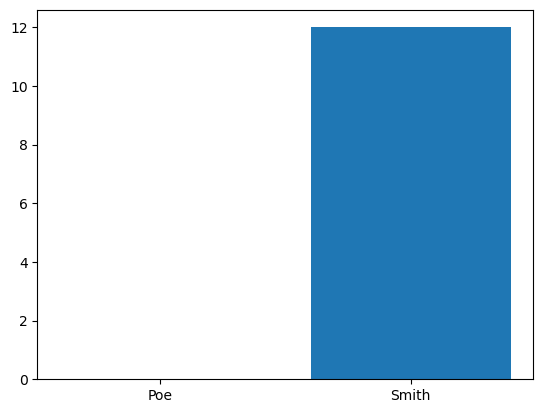

In [22]:
x = ["Poe", "Smith"]
print(type(counts["Poe"]))
y = [int(counts["Poe"]), int(counts["Smith"])]
plt.bar(x,y)
plt.savefig('bofmchart.png')